In [ ]:
import pandas as pd
import numpy as np
import shap
from pandas import Series
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = pd.read_csv('data_for_projects_1.csv', delimiter = ',')

In [ ]:
data[' target ']

0         5.46
1        10.00
2        26.44
3         3.88
4        12.94
         ...  
5042     24.46
5043     17.55
5044     49.83
5045    257.42
5046      4.88
Name:  target , Length: 5047, dtype: float64

In [ ]:
data

,program_id,program_city_group,age_group,gender_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_std,...,visit_neur_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min,visit_oft_avg_max,visit_oft_avg_mean,visit_oft_avg_min,visit_surg_avg_max,visit_surg_avg_mean,visit_surg_avg_min
0,1358,2.0,age_group_1,NaN,1.0,NaN,1.687585,1.687585,1.687585,NaN,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
1,1358,2.0,age_group_1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1358,2.0,age_group_1,1.0,1.0,NaN,1.975258,1.355735,0.652630,0.818169,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
3,1358,2.0,age_group_1,1.0,2.0,NaN,3.741448,3.485539,3.485539,0.361910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,811,2.0,age_group_1,1.0,1.0,NaN,1.647994,1.861750,1.227380,0.348698,...,2.50,6.5,4.911500,4.00,12.50,6.13715,3.50,6.50,5.144165,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1918,2.0,age_group_1,NaN,1.0,NaN,2.146535,1.285100,1.358695,0.837112,...,5.50,9.9,8.272725,7.00,1.70,8.53555,6.25,9.75,7.591665,5.50
5043,1918,2.0,age_group_1,NaN,2.0,NaN,3.495655,3.495655,3.495655,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5044,7794,NaN,age_group_1,NaN,2.0,NaN,2.212645,2.212645,2.212645,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5045,1115,NaN,age_group_1,1.0,1.0,NaN,6.611755,3.516150,3.339455,1.383525,...,4.90,49.9,1.985415,5.81,25.25,9.99740,5.00,37.45,9.727710,5.25


In [ ]:
data[['program_id', 'age_group']] = data[['program_id', 'age_group']].apply(
    lambda x: pd.factorize(x)[0])

In [ ]:
# data['service_type_id'] = data['service_type_id'].astype('float64')
# data['number_of_clinics_in_progam'] = data['number_of_clinics_in_progam'].astype('float64')
# data['program_id'] = data['program_id'].astype('float64')
# data['age_group'] = data['age_group'].astype('float64')
# data[' target '] = pd.to_numeric(data[' target '], errors = 'coerce')

In [ ]:
data = data.fillna(0)

In [ ]:
X = data.drop(' target ', axis = 1)
y = data[' target ']

In [ ]:
data = data.reset_index()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
data[' target ']

0         5.46
1        10.00
2        26.44
3         3.88
4        12.94
         ...  
5042     24.46
5043     17.55
5044     49.83
5045    257.42
5046      4.88
Name:  target , Length: 5047, dtype: float64

In [ ]:
y_test

1021     26.53
4736      8.76
4212     43.26
1198    113.70
5043     17.55
         ...  
1188     64.49
658      83.68
918      19.14
756       9.57
1662      7.98
Name:  target , Length: 1515, dtype: float64

In [ ]:
np.all(np.isfinite(data))

True

In [ ]:
# X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3)

In [ ]:
model = DecisionTreeRegressor()

grid_rf = {
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = DecisionTreeRegressor(min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END max_depth=15, min_samples_leaf=11, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=11, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=11, min_samples_split=2; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=12, min_samples_leaf=11, min_samples_split=2; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=11, min_samples_split=2; total time=   0.1s
[CV] END max_depth=12, mi

In [ ]:
dt = DecisionTreeRegressor(splitter='best', max_depth=6, min_samples_split=10, min_samples_leaf=9,random_state=42)
dt.fit(X_train, y_train)
res = dt.predict(X_test)

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


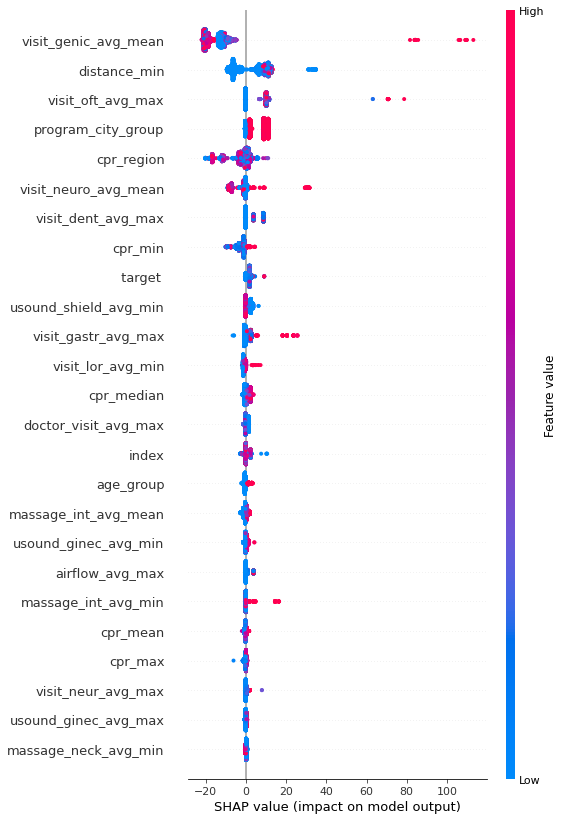

In [ ]:
shap_test = shap.TreeExplainer(dt).shap_values(data)
shap.summary_plot(shap_test, data,
                      max_display=25, auto_size_plot=True)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, res), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, res), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, res)), 4))
print("R^2   ", round(metrics.r2_score(y_test, res), 4))

MAE:   23.1375
MSE:   2690.5558
RMSE:  51.8706
R^2    0.2739


In [ ]:
model = GradientBoostingRegressor()

grid_rf = {
'n_estimators': [100, 500],
'learning_rate' : np.arange(0.0, 0.5, 0.1, dtype=float),
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = GradientBoostingRegressor(n_estimators=best_parameters['n_estimators'],
                              learning_rate = best_parameters['learning_rate'],
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=  45.5s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=  29.6s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=  29.7s
[CV] END learning_rate=0.0, max_depth=12, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.0, max_depth=12, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.0, max_depth=12, min_samples_leaf=11, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.0, max_depth=16, min_samples_leaf=13, min_samples_split=9, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.0, max_depth=16, min_samples_leaf=13, min_samples_split=9, 

In [ ]:
grboost = GradientBoostingRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf = 1, max_depth = 1, learning_rate = 0.4,random_state=0)
grboost.fit(X_train, y_train)
gbres = grboost.predict(X_test)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, gbres), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, gbres), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, gbres)), 4))
print("R^2   ", round(metrics.r2_score(y_test, gbres), 4))

MAE:   22.7259
MSE:   2772.2818
RMSE:  52.6525
R^2    0.2518


auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


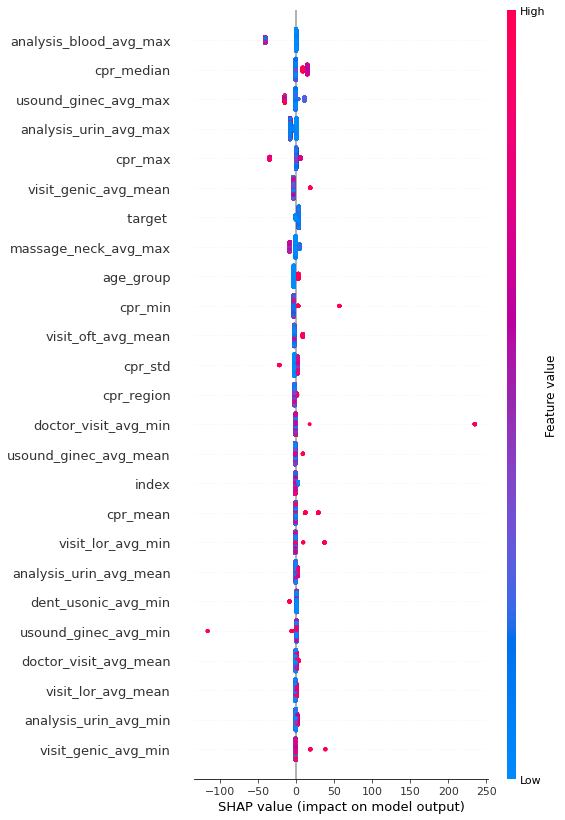

In [ ]:
shap_test = shap.TreeExplainer(grboost).shap_values(data)
shap.summary_plot(shap_test, data,
                      max_display=25, auto_size_plot=True)

#Splitted datasets regressions

In [ ]:
clinic = data
dentistry = data

In [ ]:
clinic = clinic.drop('airflow_avg_max', axis = 1)
clinic = clinic.drop('airflow_avg_mean', axis = 1)
clinic = clinic.drop('airflow_avg_min', axis = 1)

clinic = clinic.drop('dent_plomb_avg_max', axis = 1)
clinic = clinic.drop('dent_plomb_avg_mean', axis = 1)
clinic = clinic.drop('dent_plomb_avg_min', axis = 1)

clinic = clinic.drop('dent_remov_avg_max', axis = 1)
clinic = clinic.drop('dent_remov_avg_mean', axis = 1)
clinic = clinic.drop('dent_remov_avg_min', axis = 1)

clinic = clinic.drop('dent_usonic_avg_max', axis = 1)
clinic = clinic.drop('dent_usonic_avg_mean', axis = 1)
clinic = clinic.drop('dent_usonic_avg_min', axis = 1)

clinic = clinic.drop('visit_dent_avg_max', axis = 1)
clinic = clinic.drop('visit_dent_avg_mean', axis = 1)
clinic = clinic.drop('visit_dent_avg_min', axis = 1)

In [ ]:
dentistry = dentistry.drop('analysis_urin_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_urin_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_urin_avg_min', axis = 1)

dentistry = dentistry.drop('analysis_blood_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_blood_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_blood_avg_min', axis = 1)

dentistry = dentistry.drop('analysis_copro_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_copro_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_copro_avg_min', axis = 1)

dentistry = dentistry.drop('anestesy_avg_max', axis = 1)
dentistry = dentistry.drop('anestesy_avg_mean', axis = 1)
dentistry = dentistry.drop('anestesy_avg_min', axis = 1)

dentistry = dentistry.drop('anti_hcv_avg_max', axis = 1)
dentistry = dentistry.drop('anti_hcv_avg_mean', axis = 1)
dentistry = dentistry.drop('anti_hcv_avg_min', axis = 1)

dentistry = dentistry.drop('doctor_visit_avg_max', axis = 1)
dentistry = dentistry.drop('doctor_visit_avg_mean', axis = 1)
dentistry = dentistry.drop('doctor_visit_avg_min', axis = 1)

dentistry = dentistry.drop('massage_avg_max', axis = 1)
dentistry = dentistry.drop('massage_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_avg_min', axis = 1)

dentistry = dentistry.drop('massage_int_avg_max', axis = 1)
dentistry = dentistry.drop('massage_int_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_int_avg_min', axis = 1)

dentistry = dentistry.drop('massage_neck_avg_max', axis = 1)
dentistry = dentistry.drop('massage_neck_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_neck_avg_min', axis = 1)

dentistry = dentistry.drop('usound_ginec_avg_max', axis = 1)
dentistry = dentistry.drop('usound_ginec_avg_mean', axis = 1)
dentistry = dentistry.drop('usound_ginec_avg_min', axis = 1)

dentistry = dentistry.drop('usound_shield_avg_max', axis = 1)
dentistry = dentistry.drop('usound_shield_avg_mean', axis = 1)
dentistry = dentistry.drop('usound_shield_avg_min', axis = 1)

dentistry = dentistry.drop('visit_card_avg_max', axis = 1)
dentistry = dentistry.drop('visit_card_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_card_avg_min', axis = 1)

dentistry = dentistry.drop('visit_gastr_avg_max', axis = 1)
dentistry = dentistry.drop('visit_gastr_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_gastr_avg_min', axis = 1)

dentistry = dentistry.drop('visit_genic_avg_max', axis = 1)
dentistry = dentistry.drop('visit_genic_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_genic_avg_min', axis = 1)

dentistry = dentistry.drop('visit_lor_avg_max', axis = 1)
dentistry = dentistry.drop('visit_lor_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_lor_avg_min', axis = 1)

dentistry = dentistry.drop('visit_neur_avg_max', axis = 1)
dentistry = dentistry.drop('visit_neur_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_neur_avg_min', axis = 1)

dentistry = dentistry.drop('visit_neuro_avg_max', axis = 1)
dentistry = dentistry.drop('visit_neuro_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_neuro_avg_min', axis = 1)

dentistry = dentistry.drop('visit_oft_avg_max', axis = 1)
dentistry = dentistry.drop('visit_oft_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_oft_avg_min', axis = 1)

dentistry = dentistry.drop('visit_surg_avg_max', axis = 1)
dentistry = dentistry.drop('visit_surg_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_surg_avg_min', axis = 1)

In [ ]:
X_clinic = clinic.drop(' target ', axis = 1)
y_clinic = clinic[' target ']

In [ ]:
X_dentistry = dentistry.drop(' target ', axis = 1)
y_dentistry = dentistry[' target ']

In [ ]:
X_train_clinic, X_test_clinic, y_train_clinic, y_test_clinic = train_test_split(X_clinic, y_clinic, test_size=0.3)

In [ ]:
X_train_dentistry, X_test_dentistry, y_train_dentistry, y_test_dentistry = train_test_split(X_dentistry, y_dentistry, test_size=0.3)

In [ ]:
model = DecisionTreeRegressor()

grid_rf = {
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train_clinic, y_train_clinic)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = DecisionTreeRegressor(min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

In [ ]:
dt_clinic = DecisionTreeRegressor(max_depth=4, min_samples_split=10, min_samples_leaf=11,random_state=0)
dt_clinic.fit(X_train_clinic, y_train_clinic)
res_clinic = dt_clinic.predict(X_test_clinic)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, res_clinic), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, res_clinic), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, res_clinic)), 4))
print("R^2   ", round(metrics.r2_score(y_test, res_clinic), 4))

In [ ]:
model = GradientBoostingRegressor()

grid_rf = {
'n_estimators': [100, 500],
'learning_rate' : np.arange(0.0, 0.5, 0.1, dtype=float),
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train_clinic, y_train_clinic)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = GradientBoostingRegressor(n_estimators=best_parameters['n_estimators'],
                              learning_rate = best_parameters['learning_rate'],
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

In [ ]:
X_train_clinic.shape

In [ ]:
y_train_clinic.shape

In [ ]:
X_train_clinic

In [ ]:
dt_clinic_1 = GradientBoostingRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf = 1, max_depth = 1, learning_rate = 0.4,random_state=0)
dt_clinic_1.fit(X_train_clinic, y_train_clinic)
res_clinic_1 = dt_clinic.predict(X_test_clinic)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, res_clinic_1), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, res_clinic_1), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, res_clinic_1)), 4))
print("R^2   ", round(metrics.r2_score(y_test, res_clinic_1), 4))

In [ ]:
model = DecisionTreeRegressor()

grid_rf = {
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train_dentistry, y_train_dentistry)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = DecisionTreeRegressor(min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

In [ ]:
dt_dentistry = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=13,random_state=0)
dt_dentistry.fit(X_train_dentistry, y_train_dentistry)
res_dentistry = dt_dentistry.predict(X_test_dentistry)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, res_dentistry), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, res_dentistry), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, res_dentistry)), 4))
print("R^2   ", round(metrics.r2_score(y_test, res_dentistry), 4))

In [ ]:
model = GradientBoostingRegressor()

grid_rf = {
'n_estimators': [100, 500],
'learning_rate' : np.arange(0.0, 0.5, 0.1, dtype=float),
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train_dentistry, y_train_dentistry)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = GradientBoostingRegressor(n_estimators=best_parameters['n_estimators'],
                              learning_rate = best_parameters['learning_rate'],
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'])

In [ ]:
dt_dentistry_1 = GradientBoostingRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf = 1, max_depth = 1, learning_rate = 0.4,random_state=0)
dt_dentistry_1.fit(X_train_dentistry, y_train_dentistry)
res_dentistry_1 = dt_dentistry.predict(X_test_dentistry)

In [ ]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, res_dentistry_1), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, res_dentistry_1), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, res_dentistry_1)), 4))
print("R^2   ", round(metrics.r2_score(y_test, res_dentistry_1), 4))